<a href="https://colab.research.google.com/github/ehtisham409/Natural-Language-Processing/blob/main/chat_bot_(jason_data_set).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from wordcloud import WordCloud, STOPWORDS
import pickle
from sklearn.utils import shuffle
from tensorflow.keras.models import Model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from prettytable import PrettyTable
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.ticker as ticker
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate import bleu_score, bleu
np.random.RandomState(100)

RandomState(MT19937) at 0x7FB1B767D740

In [3]:
import json
import pandas as pd

file_path = '/content/drive/MyDrive/NLP/train.json'

ques = []
ans = []

with open(file_path, 'r') as f:
    data = json.load(f)

# Assuming the JSON structure is as provided
all_agent1_messages = []
all_agent2_messages = []

for conversation_id, conversation_data in data.items():
    agent1_messages = []
    agent2_messages = []

    for turn in conversation_data['content']:
        if 'message' in turn:
            if turn['agent'] == 'agent_1':
                agent1_messages.append(turn['message'])
            elif turn['agent'] == 'agent_2':
                agent2_messages.append(turn['message'])

    all_agent1_messages.extend(agent1_messages)
    all_agent2_messages.extend(agent2_messages)

# Pad the shorter list with empty strings
max_length = max(len(all_agent1_messages), len(all_agent2_messages))
all_agent1_messages += [''] * (max_length - len(all_agent1_messages))
all_agent2_messages += [''] * (max_length - len(all_agent2_messages))

# Create a DataFrame
data = pd.DataFrame({'question': all_agent1_messages, 'answer': all_agent2_messages})

# Now, df is a pandas DataFrame containing the questions and answers only.


In [4]:
data.head()

,question,answer
0,Are you a fan of Google or Microsoft?,Both are excellent technology they are helpful...
1,"I'm not a huge fan of Google, but I use it a ...",Google provides online related services and pr...
2,"Yeah, their services are good. I'm just not a ...",Google is leading the alphabet subsidiary and ...
3,Did you know Google had hundreds of live goats...,"It is very interesting. Google provide ""Chrome..."
4,I like Google Chrome. Do you use it as well fo...,Yes.Google is the biggest search engine and Go...


In [5]:
print(data.columns)

Index(['question', 'answer'], dtype='object')


In [6]:

#data1=pd.read_csv('/content/drive/MyDrive/dialogues for chat bot/bigbasket_products.csv')

#data1['answer'] = data1['brand']+'. '+data1['type']+'. '+data1['category']

#data=pd.DataFrame(data=list(zip(data1['product'], data1['answer'])),columns=['question','answer'])

In [7]:
#data

In [8]:

#data2 = pd.read_csv('/content/drive/MyDrive/dialogues for chat bot/flipkart_com-ecommerce_sample.csv')

#data2['answer'] = data2['brand']+'. '+data2['product_category_tree']

#data3=pd.DataFrame(data=list(zip(data2['product_name'], data2['answer'])) ,columns=['question','answer'])


In [9]:
#data3

## Concatenate the data

In [10]:
#data = pd.concat([data01, data1a, data3])

In [11]:
#data

### Data Preprocessing and EDA
After concatenation, we now need to preprocess the combined data, i.e., we have to replace various unformal words by their corresponding formal words. In the code below, for a given phrase or sentence, one will get the preprocessed sentence.

In [12]:
def decontractions(phrase):

    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase


Moreover, we also have to eliminate various characters i.e. @,#,$,%,^,&,*, which themselves have no meaning to describe the sentence, and may ‘confuse’ the machine, which may result in error in prediction. Also we eliminate those rows of data which has NULL values.

In [13]:
import re

# Remove special characters from 'question' and 'answer' columns, keeping only alphanumeric characters and spaces
data['question'] = data['question'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))
data['answer'] = data['answer'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

# Remove rows with NULL values
data.dropna(inplace=True)



In [14]:
data

,question,answer
0,Are you a fan of Google or Microsoft,Both are excellent technology they are helpful...
1,Im not a huge fan of Google but I use it a lo...,Google provides online related services and pr...
2,Yeah their services are good Im just not a fan...,Google is leading the alphabet subsidiary and ...
3,Did you know Google had hundreds of live goats...,It is very interesting Google provide Chrome O...
4,I like Google Chrome Do you use it as well for...,YesGoogle is the biggest search engine and Goo...
...,...,...
97199,I like adult animated series like Archer and S...,
97200,I cant believe there were so many How many yea...,
97201,Wow it does not seem like that long Since I me...,
97202,I dont think I have either Thats an insane amo...,


Since the combined data includes more than 50,000 rows of question and answers, let us now look at their lengths by using the code below:

In [15]:
print(data.columns)

Index(['question', 'answer'], dtype='object')


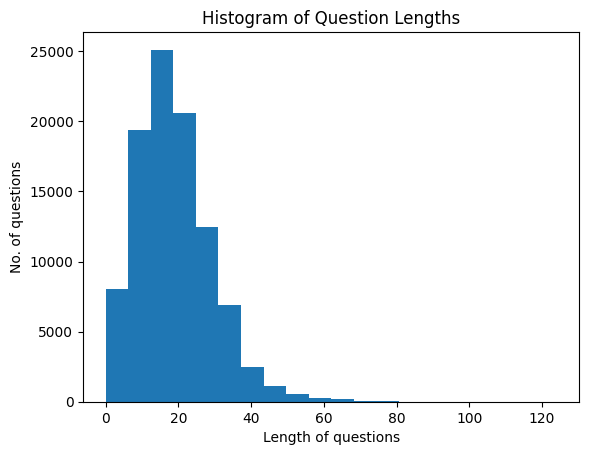

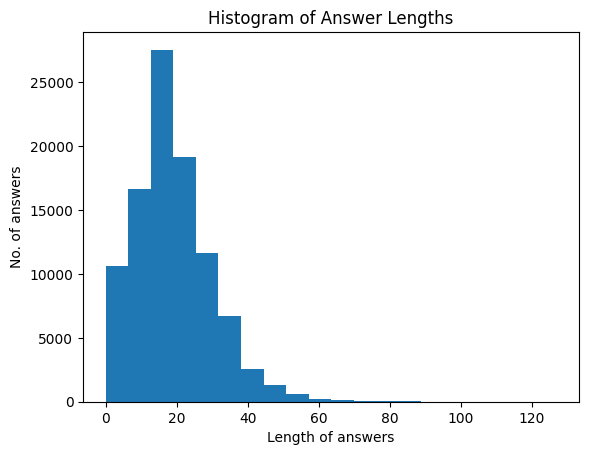

In [17]:
import matplotlib.pyplot as plt

# Histogram for question lengths
question_lengths = data['question'].str.split().apply(len)
plt.hist(question_lengths, bins=20)  # Adjust the number of bins as needed
plt.xlabel('Length of questions')
plt.ylabel('No. of questions')
plt.title('Histogram of Question Lengths')
plt.show()

# Histogram for answer lengths
answer_lengths = data['answer'].str.split().apply(len)
plt.hist(answer_lengths, bins=20)  # Adjust the number of bins as needed
plt.xlabel('Length of answers')
plt.ylabel('No. of answers')
plt.title('Histogram of Answer Lengths')
plt.show()


From the above figures, it can be easily seen that the length of most of the questions are below 10, and the maximum length of sentence for questions and answers are around 30 and 20, respectively. Let us also look at words which are more frequent in the corpus of questions.

As we have seen above that most questions and answers has below 20 words, let us now include only those sentences which have at most twenty words. In addition to that, we manually add two tokens namely, ‘<start>’ and ‘<end>’ so that the algorithm can detect when a sentence is getting starting or ended.

In [ ]:
print(data.columns)


In [18]:
# Remove rows with empty or whitespace-only values in 'question ' and 'answer ' columns
data = data[(data['question'].str.strip() != '') & (data['answer'].str.strip() != '')]

# Calculate and Filter Question and Answer Lengths
data['question_len'] = data['question'].str.split().apply(len)
data = data[data['question_len'] <= 20]

data['answer_len'] = data['answer'].str.split().apply(len)
data = data[data['answer_len'] <= 20]

# Prepare Answer Sequences
data['answer_inp'] = '<START> ' + data['answer']
data['answer_out'] = data['answer'] + ' <END>'

# Drop Unnecessary Columns
data = data.drop(['answer', 'question_len', 'answer_len'], axis=1)





<ipython-input-18-31295343e023>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['question_len'] = data['question'].str.split().apply(len)
<ipython-input-18-31295343e023>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['answer_inp'] = '<START> ' + data['answer']
<ipython-input-18-31295343e023>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
data

### Splitting the data:
Since we want some data points to validate our prediction accuracy, we randomly divide ‘questions’ and ‘answers’ in an 80:20 ratio, with 80 percent of the data used to train and the remainder can be used as the test data. We also get the length of each sentence in the code below.

In [19]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data, test_size=0.2, random_state=24)

train.iloc[0]['answer_inp']= str(train.iloc[0]['answer_inp'])+' <end>'
train.iloc[0]['answer_out']= str(train.iloc[0]['answer_out'])+' <end>'

ques_lengths = train['question'].str.split().apply(len)
ans_lengths = train['answer_inp'].str.split().apply(len)

After creating the dataset with ‘questions’, ‘answer_inp’ and ‘answer_out’, we now use the Tokenizer library to tokenize each word in a given sentence and fit it on the ‘question’ and ‘answer_inp’ corpus. In the argument of the same the filter command exclude all the given characters. The Tokenizer library also enables us to count the words in the total dataset.

In [20]:
tknizer_ques = Tokenizer()
tknizer_ques.fit_on_texts(train['question'].values)
tknizer_ans = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
tknizer_ans.fit_on_texts(train['answer_inp'].values)

vocab_size_ans=len(tknizer_ans.word_index.keys())
vocab_size_ques=len(tknizer_ques.word_index.keys())

Just tokenize a word does not give fruitful results as it does not incorporate the semantic meaning. Therefore, here we use the ‘Glove Vectors’ with which we can represent each and every word of our vocabulary by a hundred dimensional vector. So all the hundred dimensional words in our vocabulary can now be stored in the ‘embedding_matrix’.

In [21]:
embeddings_index = dict()
f = open('/content/drive/MyDrive/dialogues for chat bot/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocab_size_ans+1, 100))
for word, i in tknizer_ans.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## Data pipeline:
In this section, we will implement the path to load the train and test data into batches which can be used to train and evaluate the model. In this regard, first we convert a sentence into sequence of tokens and then put padding on it. The padding is necessary as it gives fixed length of inputs to get trained. If a sentence is shorter then it will be padded by zero tokens, and if it is large then it will only consider up-to twenty tokens which is the maximum length we have decided to take. In our inputs, we take ‘question’ and ‘answer_inp’ as our inputs to the encoder and decoder, respectively, and the predicted sentence will be matched with the ‘answer_out’ of our data.

In [22]:
class Dataset:
    def __init__(self, data, tknizer_ques, tknizer_ans, max_len):
        self.encoder_inps = data['question'].values
        self.decoder_inps = data['answer_inp'].values
        self.decoder_outs = data['answer_out'].values
        self.tknizer_ans = tknizer_ans
        self.tknizer_ques = tknizer_ques
        self.max_len = max_len

    def __getitem__(self, i):

        self.encoder_seq = self.tknizer_ques.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tknizer_ans.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_ans.texts_to_sequences([self.decoder_outs[i]])
        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        # Similarly for decoders
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        # return the final length of encoded seq., and two decoder seq.
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)  # get Length of the encoder inputs


class Dataloder(tf.keras.utils.Sequence):     # This class supply the data points to the model in batches
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [23]:
max_length =20
train_dataset = Dataset(train, tknizer_ques, tknizer_ans, max_len=max_length)
test_dataset  = Dataset(validation, tknizer_ques, tknizer_ans, 20)

train_dataloader = Dataloder(train_dataset, batch_size=128)
test_dataloader = Dataloder(test_dataset, batch_size=128)

Let us now look at how our Encoder model is built up. Here first we embed our sentences and mask them with zero. Then our Long-Short term memory
(LSTM) layer takes this as an input and yields one output and two states namely, hidden and cell state.

In [24]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        self.vocab_size = inp_vocab_size
        self.embedding_dim = embedding_size
        self.input_length = input_length
        self.lstm_size = lstm_size
        self.lstm_output = 0
        self.lstm_state_h=0
        self.lstm_state_c=0

    def build(self, input_shape):
        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_dim,
                                   input_length=self.input_length,mask_zero=True, name="embedding_layer_encoder",     )
        self.lstm = LSTM(self.lstm_size, return_state=True, return_sequences=True, name="Encoder_LSTM")


    def call(self,input_sequence, training=True):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        input_embedd                           = self.embedding(input_sequence)
        #states=self.lstm_state_h,self.lstm_state_c
        self.lstm_output, self.lstm_state_h,self.lstm_state_c = self.lstm(input_embedd)
        return self.lstm_output, self.lstm_state_h,self.lstm_state_c


    def initialize_states(self,batch_size):
   #   '''
   #   Given a batch size it will return intial hidden state and intial cell state.
   #   If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
   #   '''
        #self.batch_size=batch_size
        hidden_state=np.zeros((batch_size,self.lstm_size), dtype=float, order='C')
        cell_state=np.zeros((batch_size, self.lstm_size), dtype=float, order='C')

        return hidden_state, cell_state

Similarly, Decoder part gets input from the embedded ‘answer_inp’. It also uses the hidden and cell states of Encoder model to the LSTM layer. It finally results an updated state of hidden and cell state and LSTM output.

In [25]:
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        self.vocab_size = out_vocab_size
        self.embedding_size = embedding_size
        self.lstm_size = lstm_size
        self.input_length = input_length

        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_size,
                                   input_length=self.input_length,mask_zero=True,
                                   name="embedding_layer_decoder", trainable=False)
        self.lstm = LSTM(self.lstm_size, return_sequences=True, return_state=True, name="Encoder_LSTM")


    def call(self,input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm

          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''
        state_h = states[0]
        state_c = states[1]
        embedd = self.embedding(input_sequence)
        lstm_output,final_state_h,final_state_c = self.lstm(embedd, initial_state=[state_h, state_c])

        return lstm_output, final_state_h, final_state_c

To combine the Encoder and Decoder part, we use the code given below. In this code we make the input dimensions of word embeddings equal to 100 (as we are using the 100 dimensional glove vectors). Also for both Encoder and Decoder LSTMs, we use 512 size LSTM layer. In the code below, we also specify that the ‘question’ or ‘data[0]’ goes input to the encoder, which results three outputs: ‘encoder_output’, ‘encoder_h’, and ‘encoder_c’. The ‘encoder_h’ and ‘encoder_c’ will act as an input state of the Decoder, and the ‘answer_inp’ or ‘data[1]’ will act as an input to give the final prediction.

In [26]:

class Encoder_decoder(tf.keras.Model):

    def __init__(self,encoder_inputs_length,decoder_inputs_length, output_vocab_size):
        super().__init__()
        #Create encoder object
        self.encoder = Encoder(inp_vocab_size=vocab_size_ques+1,embedding_size =100,
                               lstm_size =512,input_length=encoder_inputs_length)
        #Create decoder object
        self.decoder = Decoder(vocab_size_ans+1,embedding_size=100,
                               lstm_size =512,input_length = decoder_inputs_length)
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        self.Dense = Dense(output_vocab_size, activation='softmax')

    def call(self, data):

        input, output = data[0], data[1]
        encoder_output, encoder_h, encoder_c = self.encoder(input)
        decode,_,_ = self.decoder(output, [encoder_h, encoder_c])
        decoder_ouputs = self.Dense(decode)

        return decoder_ouputs

In the final stage of our model, we specify the train and validation data steps, and as we have decided to use questions and answer length up to twenty only, we give the same to our encoder and decoder input lengths. We use ‘Adam’ as our optimizer from TensorFlow library, and use categorical sparse entropy as our loss function.

In [27]:
train_steps=train.shape[0]//128
valid_steps=validation.shape[0]//128

model  = Encoder_decoder(encoder_inputs_length=20,decoder_inputs_length=20,output_vocab_size=vocab_size_ans)
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')

In [28]:

model.fit(train_dataloader, steps_per_epoch=train_steps, epochs=100,
          validation_data=test_dataloader, validation_steps=valid_steps)

Epoch 1/100
203/203 [==============================] - 48s 187ms/step - loss: 6.4598 - val_loss: 6.0165
Epoch 2/100
203/203 [==============================] - 14s 68ms/step - loss: 6.0949 - val_loss: 5.9616
Epoch 3/100
203/203 [==============================] - 14s 68ms/step - loss: 5.9948 - val_loss: 5.8349
Epoch 4/100
203/203 [==============================] - 14s 67ms/step - loss: 5.8575 - val_loss: 5.7241
Epoch 5/100
203/203 [==============================] - 14s 68ms/step - loss: 5.7377 - val_loss: 5.6352
Epoch 6/100
203/203 [==============================] - 14s 69ms/step - loss: 5.6389 - val_loss: 5.5739
Epoch 7/100
203/203 [==============================] - 14s 70ms/step - loss: 5.5469 - val_loss: 5.5117
Epoch 8/100
203/203 [==============================] - 14s 69ms/step - loss: 5.4632 - val_loss: 5.4624
Epoch 9/100
203/203 [==============================] - 14s 69ms/step - loss: 5.3835 - val_loss: 5.4162
Epoch 10/100
203/203 [==============================] - 14s 69ms/step - 

In [29]:
def predict(input_sentence):
    lst = []

    x=tknizer_ques.texts_to_sequences([input_sentence])
    input_seq = pad_sequences(x, maxlen=20, dtype='int32',padding='post', truncating='post')
    encode_vals, state_h, state_c = model.layers[0](input_seq)
    init_index = np.reshape(tknizer_ans.word_index['<start>'],(1,1))

    for i in range(len(input_seq[0])):
        predicted_out,dec_state_h, dec_state_c = model.layers[1](init_index, [state_h, state_c])
        dense_out = model.layers[2](predicted_out)
        state_h = dec_state_h
        state_c = dec_state_c
        init_index = np.argmax(dense_out)
        init_index_2d = np.reshape(init_index, (1,1))
        lst.append(tknizer_ans.index_word[init_index])
        init_index = init_index_2d
        if tknizer_ans.index_word[np.argmax(dense_out)]=='<end>':
          break
        else:
          x = ' '.join(lst)
    return x
predict('are you righthanded')

'i love it actually you know any latin before they are the ones to their the us food'